 <h1>Distributed Latent Dirichlet Allocation<span class="tocSkip"></span></h1>

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Notebook-instructions" data-toc-modified-id="Notebook-instructions-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Notebook instructions</a></span></li><li><span><a href="#Process-and-clean-all-data" data-toc-modified-id="Process-and-clean-all-data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Process and clean all data</a></span><ul class="toc-item"><li><span><a href="#Extract-metadata" data-toc-modified-id="Extract-metadata-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Extract metadata</a></span></li><li><span><a href="#Convert-json-files-into-structured-Spark-DataFrames" data-toc-modified-id="Convert-json-files-into-structured-Spark-DataFrames-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Convert json files into structured Spark DataFrames</a></span></li></ul></li><li><span><a href="#LDA-Preliminaries" data-toc-modified-id="LDA-Preliminaries-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>LDA Preliminaries</a></span><ul class="toc-item"><li><span><a href="#Tokenise,-remove-stopwords-and-lemmatise" data-toc-modified-id="Tokenise,-remove-stopwords-and-lemmatise-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Tokenise, remove stopwords and lemmatise</a></span></li><li><span><a href="#Convert-tokens-into-sparse-vectors" data-toc-modified-id="Convert-tokens-into-sparse-vectors-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Convert tokens into sparse vectors</a></span></li></ul></li><li><span><a href="#Perform-LDA-analysis" data-toc-modified-id="Perform-LDA-analysis-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Perform LDA analysis</a></span><ul class="toc-item"><li><span><a href="#EM" data-toc-modified-id="EM-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>EM</a></span></li><li><span><a href="#Online-LDA" data-toc-modified-id="Online-LDA-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Online LDA</a></span><ul class="toc-item"><li><span><a href="#Distributed-online-LDA" data-toc-modified-id="Distributed-online-LDA-4.2.1"><span class="toc-item-num">4.2.1&nbsp;&nbsp;</span>Distributed online LDA</a></span></li><li><span><a href="#Non-distributed-online-LDA" data-toc-modified-id="Non-distributed-online-LDA-4.2.2"><span class="toc-item-num">4.2.2&nbsp;&nbsp;</span>Non-distributed online LDA</a></span></li></ul></li><li><span><a href="#Gibbs-LDA" data-toc-modified-id="Gibbs-LDA-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Gibbs LDA</a></span><ul class="toc-item"><li><span><a href="#Non-distributed-Gibbs-LDA" data-toc-modified-id="Non-distributed-Gibbs-LDA-4.3.1"><span class="toc-item-num">4.3.1&nbsp;&nbsp;</span>Non-distributed Gibbs LDA</a></span></li><li><span><a href="#Distributed-Gibbs-LDA" data-toc-modified-id="Distributed-Gibbs-LDA-4.3.2"><span class="toc-item-num">4.3.2&nbsp;&nbsp;</span>Distributed Gibbs LDA</a></span></li></ul></li></ul></li><li><span><a href="#Model-Evaluation" data-toc-modified-id="Model-Evaluation-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Model Evaluation</a></span><ul class="toc-item"><li><span><a href="#Hyperparameter-settings" data-toc-modified-id="Hyperparameter-settings-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Hyperparameter settings</a></span></li><li><span><a href="#Perplexity-and-efficiency" data-toc-modified-id="Perplexity-and-efficiency-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Perplexity and efficiency</a></span></li><li><span><a href="#EM-and-online-topic-coherence-measures" data-toc-modified-id="EM-and-online-topic-coherence-measures-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>EM and online topic coherence measures</a></span></li></ul></li><li><span><a href="#Scaling-up" data-toc-modified-id="Scaling-up-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Scaling up</a></span><ul class="toc-item"><li><span><a href="#Gibbs" data-toc-modified-id="Gibbs-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Gibbs</a></span></li><li><span><a href="#Online" data-toc-modified-id="Online-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Online</a></span></li></ul></li><li><span><a href="#Bibliography" data-toc-modified-id="Bibliography-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Bibliography</a></span></li><li><span><a href="#Acknowledgements" data-toc-modified-id="Acknowledgements-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Acknowledgements</a></span></li></ul></div>

# Notebook instructions
1. Please view in Jupyter notebook and not in a GitHub renderer as many of the plots will not load
2. This is just a brief walk through of the code used for analysis. Full details of research and methods can be found in the PDF report titled **ST446_Final**.
3. I have stored as much data as I can in the GitHub repo so that code can run from one folder. However, due to data that was too large to store in GitHub, some folders (data and code) are stored in Google Drive. Please see this [link](https://drive.google.com/open?id=1F7x4d6jm-f7IMDvjjAXzHZO9J6B5PcYj) for the ParallelGibbsLDA folder and this [link](https://drive.google.com/open?id=1k2UsTknRIlGH4fbTXVP3jY4bdLdKtmHG) for the clean_data folder. You will see whether data has been used from these folders by looking at the filepaths throughout the notebook.
4. A large portion of the code used exists in Python and Scala scripts, primarily in the ParallelGibbsLDA folder on Google Drive and topic_interpretability folder in the GitHub repo. 
5. The data processing takes quite some time - in order to skip having to run this code, I have stored the features vector which can be read into the notebook using the last cell in Section 3.2. This data is sufficient for most of the LDA analysis.  
6. Large data is stored using HDFS, and often parquet file formats. Python pickle objects are used to save simple items like small lists. 
7. Most of this notebook was run using a PySpark kernel on my laptop to preserve GCP credits. LDA analysis was then run on GCP to measure efficiency. All code below should run as is provided a PySpark kernel is used and the modules in the cell below are installed. Please contact me if you have any problems running the code.

Links mentioned above:  
ParallelGibbsLDA: https://drive.google.com/drive/folders/1PCkNibPf-1i9QcatBGxOjo0V5cRE3jBo?usp=sharing  
clean_data: https://drive.google.com/drive/folders/1t7gY6Hlp1wKhIVX6bqXPpSi74xtU1hcB?usp=sharing   

In [1]:
from pyspark.sql.types import *
import glob 
import os
import json
from pprint import pprint
from copy import deepcopy
import numpy as np
import pandas as pd
from tqdm.notebook import tqdm
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import string
from pyspark.ml.feature import CountVectorizer, CountVectorizerModel
import pyspark.ml.clustering
from pyspark.ml.clustering import LDA, LocalLDAModel
import lda
from nltk.corpus import wordnet
from time import time
import random
from gensim.test.utils import common_texts
from gensim.corpora.dictionary import Dictionary
from gensim.models.ldamulticore import LdaMulticore
from gensim.models.ldamodel import LdaModel
import inspect
import logging
import sys
import multiprocessing
from operator import itemgetter 
import pickle
from pyspark.ml.linalg import DenseVector

# Plots
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly
from plotly.subplots import make_subplots

%matplotlib inline
# nltk.download('all')

# Need to increase driver size for some results
sc._conf.set("spark.driver.maxResultSize", "0")

# Modules above need to be installed from the command line if they are not already on your machine

unable to import 'smart_open.gcs', disabling that module


# Process and clean all data
## Extract metadata
Pandas will be used to clean, process the data and store the data in csv files. The data is then loaded using Spark DataFrames. I use Pandas because it is faster to process data than Spark when JSON files are not in newline-delimited JSON format which is the case here. Spark can only process the file in parallel if the data is in this format (see this [link](https://docs.databricks.com/data/data-sources/read-json.html) for more details).

As the situation develops and knowledge accumulates, more articles are added to the database. The current analysis is applicable to the database as at 09/04/20.

In [2]:
# I did not have space for the below file on google drive, but the cleaned version are
# on google drive in the cleaned_data folder
file_path = "CORD-19-research-challenge"

# Read metadata
corpus_metadata = spark.read.csv(f'{file_path}/metadata.csv', header=True)

# We show the table vertically for visualisation purposes
corpus_metadata.show(1, truncate=True, vertical=True)

# Check if there are pmc_xml_parses but no pdf_parse - these will have to be
# processed differently
print('Number of documents with pmc_xml_parse but not pdf_parse:')
corpus_metadata.filter(corpus_metadata['has_pdf_parse']=='False') \
                .filter(corpus_metadata['has_pmc_xml_parse']=='True').count()

-RECORD 0-------------------------------------------
 cord_uid                    | 8q5ondtn             
 sha                         | null                 
 source_x                    | Elsevier             
 title                       | Intrauterine viru... 
 doi                         | 10.1016/0002-8703... 
 pmcid                       | null                 
 pubmed_id                   | 4361535              
 license                     | els-covid            
 abstract                    | Abstract The etio... 
 publish_time                | 1972-12-31           
 authors                     | Overall, James C.    
 journal                     | American Heart Jo... 
 Microsoft Academic Paper ID | null                 
 WHO #Covidence              | null                 
 has_pdf_parse               | False                
 has_pmc_xml_parse           | False                
 full_text_file              | custom_license       
 url                         | https://doi.org

639

I analyse the data with pdf_parses as they make up the bulk of the data.

## Convert json files into structured Spark DataFrames

In [3]:
# Read in all articles from the json files - see how many json files need to be processed
json_file_names = sc.parallelize(glob.glob(f'{file_path}/**/pdf_json/*.json', recursive=True))
json_file_names.count()

36236

In [4]:
# Helper functions to load data

def format_name(author):
    middle_name = " ".join(author['middle'])
    
    if author['middle']:
        return " ".join([author['first'], middle_name, author['last']])
    else:
        return " ".join([author['first'], author['last']])


def format_affiliation(affiliation):
    text = []
    location = affiliation.get('location')
    if location:
        text.extend(list(affiliation['location'].values()))
    
    institution = affiliation.get('institution')
    if institution:
        text = [institution] + text
    return ", ".join(text)

def format_authors(authors, with_affiliation=False):
    name_ls = []
    
    for author in authors:
        name = format_name(author)
        if with_affiliation:
            affiliation = format_affiliation(author['affiliation'])
            if affiliation:
                name_ls.append(f"{name} ({affiliation})")
            else:
                name_ls.append(name)
        else:
            name_ls.append(name)
    
    return ", ".join(name_ls)

def format_body(body_text):
    texts = [(di['section'], di['text']) for di in body_text]
    texts_di = {di['section']: "" for di in body_text}
    
    for section, text in texts:
        texts_di[section] += text

    body = ""

    for section, text in texts_di.items():
        body += section
        body += "\n\n"
        body += text
        body += "\n\n"
    
    return body

def format_bib(bibs):
    if type(bibs) == dict:
        bibs = list(bibs.values())
    bibs = deepcopy(bibs)
    formatted = []
    
    for bib in bibs:
        bib['authors'] = format_authors(
            bib['authors'], 
            with_affiliation=False
        )
        formatted_ls = [str(bib[k]) for k in ['title', 'authors', 'venue', 'year']]
        formatted.append(", ".join(formatted_ls))

    return "; ".join(formatted)

def load_files(dirname):
    print('Loading json files...')
    filenames = os.listdir(dirname)
    raw_files = []

    for filename in tqdm(filenames):
        filename = dirname + filename
        file = json.load(open(filename, 'rb'))
        raw_files.append(file)
    
    return raw_files

def generate_clean_df(all_files):
    print('Cleaning json files...')
    cleaned_files = []
    
    for file in tqdm(all_files):
        features = [
            file['paper_id'],
            file['metadata']['title'],
            format_authors(file['metadata']['authors']),
            format_authors(file['metadata']['authors'], 
                           with_affiliation=True),
            format_body(file['abstract']),
            format_body(file['body_text']),
            format_bib(file['bib_entries']),
            file['metadata']['authors'],
            file['bib_entries']
        ]

        cleaned_files.append(features)

    col_names = ['paper_id', 'title', 'authors',
                 'affiliations', 'abstract', 'text', 
                 'bibliography','raw_authors','raw_bibliography']

    clean_df = pd.DataFrame(cleaned_files, columns=col_names)
    clean_df.head()
    
    return clean_df

In [ ]:
# This cell runs the cleaning and saving of all the data to csv files

bio_dir = 'CORD-19-research-challenge/biorxiv_medrxiv/biorxiv_medrxiv/pdf_json/'
print('Bio dataset:')
bio_files = load_files(bio_dir)
bio_df = generate_clean_df(bio_files)
bio_df.to_csv('/clean_data/clean_bio.csv', index=False, sep='\t')
# display(bio_df.head(1))

cust_dir = 'CORD-19-research-challenge/custom_license/custom_license/pdf_json/'
print('Custom dataset:')
cust_files = load_files(cust_dir)
cust_df = generate_clean_df(cust_files)
cust_df.to_csv('/clean_data/clean_cust.csv',
               index=False, sep='\t')
# display(cust_df.head(1))

comm_dir = 'CORD-19-research-challenge/comm_use_subset/comm_use_subset/pdf_json/'
print('Comm dataset:')
comm_files = load_files(comm_dir)
comm_df = generate_clean_df(comm_files)
comm_df.to_csv('/clean_data/clean_comm.csv', index=False, sep='\t')
# display(comm_df.head(1))

noncomm_dir = 'CORD-19-research-challenge/noncomm_use_subset/noncomm_use_subset/pdf_json/'
print('Noncomm dataset:')
noncomm_files = load_files(noncomm_dir)
noncomm_df = generate_clean_df(noncomm_files)
noncomm_df.to_csv('/clean_data/clean_noncomm.csv', index=False, sep='\t')
# display(noncomm_df.head(1))

In [32]:
# This cell loads the data stored in csv files into Spark DataFrames

all_files = ['clean_data/clean_bio.csv',
             'clean_data/clean_cust.csv',
             'clean_data/clean_comm.csv',
             'clean_data/clean_noncomm.csv']

csv_file_lengths = []
csv_li = []
for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0, sep = '\t')
    csv_file_lengths.append(len(df))
    csv_li.append(df)

df = pd.concat(csv_li, axis=0, ignore_index=False)

# Convert the above Pandas DF containing all data to a Spark DataFrame
cols = list(df.columns)
df[cols] = df[cols].astype(str)
all_data = spark.createDataFrame(df)
print('One entry of the DataFrame containing all texts: ')
all_data.show(1, truncate=True, vertical=True)

# Ensure the length of each df, the union of the dfs and the Spark DataFrame are
# the same
print('Sum of DFs: ' + str(sum(csv_file_lengths)))
print('Union of DFs: ' + str(len(df)))
print('Spark DataFrame: ' + str(all_data.count()))

# I now delete all the intermediate DataFrames to avoid them using up memory
del csv_li
try: 
    del bio_df, comm_df, noncomm_df, cust_df, df
except:
    print('Pandas DataFrames have been deleted')

One entry of the DataFrame containing all texts: 
-RECORD 0--------------------------------
 paper_id         | f905f78b32f63c6d1... 
 title            | Multimerization o... 
 authors          | Meytal Galilee, A... 
 affiliations     | Meytal Galilee (T... 
 abstract         | Abstract

New ant... 
 text             | 

In the absence ... 
 bibliography     | HIV drug resistan... 
 raw_authors      | [{'first': 'Meyta... 
 raw_bibliography | {'BIBREF0': {'ref... 
only showing top 1 row

Sum of DFs: 36236
Union of DFs: 36236
Spark DataFrame: 36236
Pandas DataFrames have been deleted


Because we do not need structured data to perform LDA, I convert the text and abstract components of all the data into an RDD. Each component of the RDD will consist of the abstract and main text concatenated. All documents in the corpus are given a key value of 1 so that I am able to make use of RDD key-value pair actions and transformations.

In [ ]:
all_text = all_data.select('text','abstract').rdd \
                                    .map(tuple).map(lambda x: x[0]+x[1]) \
                                    .map(lambda x: (1, x))
all_text.saveAsTextFile("clean_data/text_rdd.txt")

# LDA Preliminaries
## Tokenise, remove stopwords and lemmatise
In this section I tokenise words, remove stopwords and non-informative symbols and lemmatise tokens.

In [2]:
# Tokenise and lemmatise

all_text = sc.textFile('clean_data/text_rdd.txt').map(eval)
corpus_size = str(all_text.count())
print('Corpus size: ' + corpus_size)

stop_words = set(stopwords.words('english'))
table = str.maketrans('', '', string.punctuation)
lmtzr = WordNetLemmatizer() 

def get_wordnet_pos(word):
    """Returns the part of speech of the given word
    Improves the accuracy of the lemmatize function
    when the part of speech is included as a parameter"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)

def get_tokens(line):
    '''Extracts the lemmatized tokens'''
    tokens = word_tokenize(line)
    # Convert to lower case
    tokens = [w.lower() for w in tokens]
    # Remove puncutation
    stripped = [w.translate(table) for w in tokens]
    # Remove non-alphabetic tokens
    words = [word for word in stripped if word.isalpha()]
    # Remove stop words
    words = [w for w in words if not w in stop_words]
    # Lemmatize the words - importantly, we first establish the part
    # of speech of the word because this allows the lemmatizer to 
    # work much more efficiently
    words = [lmtzr.lemmatize(w, get_wordnet_pos(w)) for w in words]
    return (words)

all_text = all_text.map(lambda line: (line[0], get_tokens(line[1])))

Corpus size: 36236


## Convert tokens into sparse vectors
Each feature is structured as follows:  
(Number of distinct token in corpus, {Index of word appearing in particular document: Number of times that word appears in the document}).  

The code below might have to be run 2-3 times due to a bug in nltk.corpus.wordnet. This will not affect results.

In [ ]:
text_df = spark.createDataFrame(all_text, ["dummy","text"])
cv = CountVectorizer(inputCol="text", outputCol="features", minDF=2, vocabSize=50000000)
cv_model = cv.fit(text_df)

features = cv_model.transform(text_df)
features.cache()

# Save the vocab and features as a parquet file
cv_model.save("clean_data/cv_model")
features.write.parquet("clean_data/features.parquet")

In [10]:
cv_model = CountVectorizerModel.load("clean_data/cv_model")
features = spark.read.parquet("clean_data/features.parquet")

# Use a small subset of features for development purposes - remove for production
# features = features.limit(100)

# features.cache()
# features.count() # enforces the cache
print('Each row is a document in the corpus with its text and corresponding sparse feature mapping:')
features.show(10)

print('The number of tokens in the vocabulary is:', features.take(1)[0]['features'].size)

Each row is a document in the corpus with its text and corresponding sparse feature mapping:
+-----+--------------------+--------------------+
|dummy|                text|            features|
+-----+--------------------+--------------------+
|    1|[emerge, reemergi...|(424507,[1,2,5,8,...|
|    1|[introduction, su...|(424507,[1,2,3,4,...|
|    1|[introduction, co...|(424507,[0,1,2,5,...|
|    1|[introduction, re...|(424507,[0,1,2,5,...|
|    1|[process, specula...|(424507,[0,1,3,4,...|
|    1|[hämophagozytisch...|(424507,[2,3,4,5,...|
|    1|[introduction, pn...|(424507,[0,1,2,5,...|
|    1|[abstract, increa...|(424507,[1,2,5,7,...|
|    1|[perspective, tai...|(424507,[0,5,7,8,...|
|    1|[introduction, bi...|(424507,[0,1,2,5,...|
+-----+--------------------+--------------------+
only showing top 10 rows

The number of tokens in the vocabulary is: 424507


# Perform LDA analysis
Spark supports two LDA algorithms:
1. Expectation maximisation (EM) algorithm
2. Online algorithm

I use an additional algorithm (Gibbs sampling) that is not implemented in Spark.

Distributed and non-distributed forms of the above three algorithms are explored below.

## EM


In [22]:
def spark_lda(algo, topic_num, feature_vecs, max_iter=5, seed=False):
    '''Returns an LDAModel object and LDA object. The user can specify
    1. The algorithm to be used 
    2. The number of topics required
    3. The input feature vector
    4. The number of iterations to be performed
    5. Whether results should be random - any seed integer will prevent random results'''
    if seed:
        lda = LDA(k=topic_num, maxIter=5, optimizer=algo, seed=seed)
    else:
        lda = LDA(k=topic_num, maxIter=5, optimizer=algo)
    lda_model = lda.fit(feature_vecs)
    
    return lda_model, lda


    
def topic_dict(lda_model, lda, words_per_topic=5):
    '''Takes an LDA model and returns a dictionary of all topics and their 
    corresponding highest weighted words. The number of words per topic
    can be specified by the user'''
    # Extract highest weighted terms per topic
    topics = lda_model.describeTopics(words_per_topic)
    # Store a dict of topics and their words
    topic_i = topics.select("termIndices").rdd.map(lambda r: r[0]).collect()
    topic_dict = {'Topic ' + str(i+1):0 for i in range(lda.getK())}
    for i,j in enumerate(topic_i):
        topic_dict['Topic ' + str(i+1)] = np.array(cv_model.vocabulary)[j]
        
    return topic_dict

# Run EM LDA 
print('EM LDA:')
em_lda_model, em_lda = spark_lda(algo='em', topic_num=10, feature_vecs=features, 
                           max_iter=5)

# Describe topics using the top 5 weighted words
topic_dbn_em = topic_dict(em_lda_model, em_lda, words_per_topic = 5)
for topic in topic_dbn_em:
    print(topic + ':' , topic_dbn_em[topic])

EM LDA:
Topic 1: ['cell' 'use' 'virus' 'et' 'al']
Topic 2: ['cell' 'use' 'virus' 'et' 'al']
Topic 3: ['cell' 'use' 'virus' 'et' 'al']
Topic 4: ['cell' 'use' 'virus' 'et' 'al']
Topic 5: ['cell' 'use' 'virus' 'et' 'al']
Topic 6: ['cell' 'use' 'virus' 'et' 'al']
Topic 7: ['cell' 'use' 'virus' 'et' 'al']
Topic 8: ['cell' 'use' 'virus' 'et' 'al']
Topic 9: ['cell' 'use' 'virus' 'et' 'al']
Topic 10: ['cell' 'use' 'virus' 'et' 'al']


## Online LDA
### Distributed online LDA

In [46]:
# Run online LDA
print('Online LDA:')
online_lda_model, online_lda = spark_lda(algo='online', topic_num=10, feature_vecs=features, 
                           max_iter=5)

# Describe topics using the top 5 weighted words
topic_dbn_online = topic_dict(online_lda_model, online_lda, words_per_topic = 5)
for topic in topic_dbn_online:
    print(topic + ':' , topic_dbn_online[topic])

Online LDA:
Topic 1: ['virus' 'use' 'infection' 'study' 'di']
Topic 2: ['cell' 'virus' 'use' 'protein' 'al']
Topic 3: ['al' 'et' 'q' 'use' 'virus']
Topic 4: ['patient' 'study' 'use' 'disease' 'may']
Topic 5: ['de' 'la' 'en' 'el' 'los']
Topic 6: ['der' 'die' 'und' 'use' 'patient']
Topic 7: ['de' 'le' 'la' 'et' 'à']
Topic 8: ['use' 'virus' 'health' 'disease' 'study']
Topic 9: ['cell' 'use' 'protein' 'infection' 'gene']
Topic 10: ['virus' 'cell' 'infection' 'use' 'protein']


### Non-distributed online LDA

In [5]:
# This makes use of the text file created in the distributed Gibbs section - please create
# that text file before running this cell (or use the file in clean_data on google drive)
single_online_data = [line.rstrip('\r\n').split(' ') for line in open('clean_data/all_text.txt')]
    
# Process to useable form
dictionary = Dictionary(single_online_data)
s_online_corpus = [dictionary.doc2bow(text) for text in single_online_data]
temp = dictionary[0]  
id2word = dictionary.id2token

# All gensim models use parallel computing - by setting workers to 1, we restrict the algorithm 
# to using one core to gain a better idea of non-distributed computing
s_online_model = LdaMulticore(s_online_corpus, id2word=id2word, num_topics=10, iterations = 5,
                                          workers = 1)

s_online_model.show_topics(num_words = 5)

[(0,
  '0.016*"protein" + 0.012*"use" + 0.011*"cell" + 0.007*"rna" + 0.006*"virus"'),
 (1,
  '0.011*"use" + 0.008*"cell" + 0.008*"study" + 0.008*"q" + 0.006*"infection"'),
 (2,
  '0.008*"health" + 0.008*"case" + 0.006*"disease" + 0.006*"use" + 0.006*"data"'),
 (3,
  '0.038*"cell" + 0.011*"virus" + 0.011*"protein" + 0.009*"viral" + 0.008*"mouse"'),
 (4,
  '0.015*"virus" + 0.010*"cell" + 0.010*"infection" + 0.008*"al" + 0.008*"mouse"'),
 (5,
  '0.010*"may" + 0.007*"disease" + 0.005*"use" + 0.005*"animal" + 0.005*"infection"'),
 (6,
  '0.023*"patient" + 0.012*"study" + 0.011*"infection" + 0.008*"respiratory" + 0.007*"clinical"'),
 (7, '0.086*"de" + 0.053*"la" + 0.032*"en" + 0.020*"el" + 0.016*"que"'),
 (8,
  '0.015*"virus" + 0.015*"sequence" + 0.012*"gene" + 0.011*"use" + 0.010*"al"'),
 (9, '0.011*"et" + 0.010*"al" + 0.010*"protein" + 0.010*"cell" + 0.008*"use"')]

## Gibbs LDA

I proceed to LDA analysis using Gibbs sampling (MCMC method) in an attempt to improve accuracy and efficiency.

I perform distributed and non-distributed Gibbs sampling to compare efficiency.




In [13]:
# Convert the data from a sparse vector type to numpy array for non-distributed Gibbs
gibbs_matrix = []
gibbs_data = features.select('features').rdd.map(tuple).collect()
for doc in gibbs_data:
    gibbs_matrix.append(doc[0].toArray())   
gibbs_matrix = np.array(gibbs_matrix,dtype='int32')

# Corpus size, vocab size, total word count
total_words = features.rdd.map(lambda x: x[2]).map(lambda x: sum(x)).map(lambda x: (1, x)) \
                        .reduceByKey(lambda x,y: x+y).map(lambda x: x[1]).take(2)[0]

vocab_count = features.take(1)[0]['features'].size

print('Corpus size:', corpus_size, 'documents')
print('Vocab count:',vocab_count, 'tokens')
print('Total word count:', int(total_words), 'words')

Corpus size: 36326 documents
Vocab count: 424507 tokens
Total word count: 100414583 words


### Non-distributed Gibbs LDA

In [120]:
# Run Gibbs sampling LDA

# logging.disable(logging.CRITICAL)
logging.disable(logging.NOTSET)

class sub_gibbs(lda.LDA):
    '''Will be used for perplexity calculations - changes the document topic distribution
    to one that is estimated from the test corpus so that log perplexities can be calculated for
    the test data'''
    def change_ndz_(self, X):
        self.ndz_ = X
        
    def _transform_single(self, doc, max_iter, tol):
        """Transform a single document according to the previously fit model
        Adapted from source code so we can prevent softmax step - we dont want softmaxes
        if we are trying to calculate the perplexities
        """
        PZS = np.zeros((len(doc), self.n_topics))
        for iteration in range(max_iter + 1): # +1 is for initialization
            PZS_new = self.components_[:, doc].T
            PZS_new *= (PZS.sum(axis=0) - PZS + self.alpha)
            PZS_new /= PZS_new.sum(axis=1)[:, np.newaxis] # vector to single column matrix
            delta_naive = np.abs(PZS_new - PZS).sum()
            PZS = PZS_new
            if delta_naive < tol:
                break
        theta_doc = PZS.sum(axis=0)
        assert len(theta_doc) == self.n_topics
        assert theta_doc.shape == (self.n_topics,)
        return theta_doc

def non_dist_gibbs(input_data, testing = False):
    '''Runs single node LDA - testing is set to true when testing the algorithm speed
    later in the notebook'''
    t0 = time()
    gibbs_model = sub_gibbs(n_topics=10, n_iter=700)
    gibbs_model.fit(input_data)
    topic_word = gibbs_model.topic_word_
    n_top_words = 5
    if not testing:
        for i, topic_dist in enumerate(topic_word):
            topic_words = np.array(cv_model.vocabulary)[np.argsort(topic_dist)][:-(n_top_words+1):-1]
            print('Topic {}: {}'.format(i, ' '.join(topic_words)))
    if testing:        
        return gibbs_model

non_dist_gibbs(gibbs_matrix)

INFO:lda:n_documents: 36236
INFO:lda:vocab_size: 262144
INFO:lda:n_words: 100414583
INFO:lda:n_topics: 10
INFO:lda:n_iter: 700
INFO:lda:<0> log likelihood: -1098633068
INFO:lda:<10> log likelihood: -965252235
INFO:lda:<20> log likelihood: -881903738
INFO:lda:<30> log likelihood: -874255504
INFO:lda:<40> log likelihood: -871124824
INFO:lda:<50> log likelihood: -869483076
INFO:lda:<60> log likelihood: -868454612
INFO:lda:<70> log likelihood: -867672354
INFO:lda:<80> log likelihood: -866967563
INFO:lda:<90> log likelihood: -866355762
INFO:lda:<100> log likelihood: -865865361
INFO:lda:<110> log likelihood: -865452062
INFO:lda:<120> log likelihood: -865017001
INFO:lda:<130> log likelihood: -864646133
INFO:lda:<140> log likelihood: -864328690
INFO:lda:<150> log likelihood: -863943944
INFO:lda:<160> log likelihood: -863555778
INFO:lda:<170> log likelihood: -863318148
INFO:lda:<180> log likelihood: -863023014
INFO:lda:<190> log likelihood: -862797337
INFO:lda:<200> log likelihood: -862723136
I

Topic 0: de le la à et
Topic 1: patient study infection respiratory virus
Topic 2: protein virus sequence rna viral
Topic 3: cell mouse infection response expression
Topic 4: use cell virus antibody sample
Topic 5: de la en compound el
Topic 6: health disease use outbreak public
Topic 7: al et e di der
Topic 8: use model data number method
Topic 9: may disease animal cause infection


### Distributed Gibbs LDA 
First attempts to build a Gibbs sampling LDA in Spark revolved around creating a child class from the built-in Spark class below:

In [30]:
print(inspect.getsource(pyspark.ml.clustering.LDA)[:217],flush=True)

class LDA(JavaEstimator, HasFeaturesCol, HasMaxIter, HasSeed, HasCheckpointInterval,
          JavaMLReadable, JavaMLWritable):
    """
    Latent Dirichlet Allocation (LDA), a topic model designed for text documents.


However, the only functions written in PySpark are basic functions that fetch the results of methods on instances. All computation is done via calls to Java and Scala code. For this reason, I proceeded to build a Gibbs sampling LDA class from scratch in Pyspark. I was attempting to implement Collapsed Gibbs Sampling for LDA. I managed to run LDA analysis using the class below, however, the sequential nature of the algorithm did not allow me to leverage the efficiency gains offered by Spark (the sequential nature of CGS is discussed in the paper).  The code is included below for completeness purposes, but results were not used in any of the analysis for this reason.

In [ ]:
# NB: This code is not used in any analysis - can be skipped

# We use sparse vectors, in the form of an RDD, as the sparse topic matrix
# The final RDD will consist of key value pairs where the keys are the document
# numbers and the values are the sparse vectors for each document 

part = multiprocessing.cpu_count()*3
gibbs_rdd = sc.parallelize(gibbs_matrix, part)

total_words = gibbs_rdd.map(lambda x: (1, x)) \
                        .map(lambda x: (x[0],sum(x[1]))) \
                        .reduceByKey(lambda x,y: x+y) \
                        .collect()[0][1]

vocab_count = gibbs_matrix.shape[1]-len(np.argwhere(np.all(gibbs_matrix == 0, axis=0)))
print('Vocab count:',vocab_count)

gibbs_rdd = gibbs_rdd.zipWithIndex().map(lambda x: (x[1], x[0]))
gibbs_rdd.cache()
print('Count:',gibbs_rdd.count()) # enforce the cache
print('Partitions: ' + str(gibbs_rdd.getNumPartitions()))
gibbs_rdd.take(5)

class Gibbs_LDA():
    '''This class behaves performs collapsed Gibbs Sampling. Unlike Sparks ml module which has
    two optimisation options, collapsed Gibbs Sampling will be the only, and default option
    for this class
    
    Requires input data to be in RDD form, with the key being is the document number in the
    corpus and the values being a numpy sparse vector for each document
    
    Important code notation used for the Gibbs sampling formula
    nzw_: number of times word w has been assigned to topic z
    ndz_: number of times a word from document d has been assigned to topic z
    nz_: number of words in topic z
    
    '''
        
    def __init__(self, n_topics, total_words, vocab_count,
                 n_iter=2000, alpha=0.1, eta=0.01, random_state=None, refresh=10):
        self.n_topics = n_topics
        self.n_iter = n_iter
        self.alpha = alpha
        self.eta = eta
        self.total_words = total_words
        self.vocab_count = vocab_count
        # If random_state is None, check_random_state(None) does nothing
        # other than return the current numpy RandomState. The random numbers
        # will be different every time LDA is run 
        self.random_state = random_stateh

        if alpha <= 0 or eta <= 0:
            raise ValueError("Alpha and eta must be greater than zero")

        # Generate random numbers that are reused 
        rng = lda.utils.check_random_state(random_state)
        self._rands = rng.rand(1024**2 // 8) 


    def _initialize(self, X):
        '''Converts the instance attributes into a format that can be easily fed to the
        fit function and that allows for tracking of the fitting process
        Takes total words as an argument to speed up computation'''
        D, W = (X.count(), self.vocab_count)
        N = int(self.total_words)
        n_topics = self.n_topics
        n_iter = self.n_iter
        # Partitions is set to 3 times the number of cores 
        part = multiprocessing.cpu_count()*3
        
        self.nzw_ = nzw_ = sc.parallelize(np.zeros((n_topics, W), dtype=np.intc), part). \
            zipWithIndex().map(lambda x: (x[1],x[0]))
        self.ndz_ = ndz_ = sc.parallelize(np.zeros((D, n_topics), dtype=np.intc), part). \
            zipWithIndex().map(lambda x: (x[1],x[0]))
        self.nz_ = nz_ = sc.parallelize(np.zeros(n_topics, dtype=np.intc), part)
        
        # WS[k] is the index (from vocab) of the kth word in the corpus - basically
        # it just puts the index of a word for everytime it appears in the corpus
        # DS[k] is the document index of the kth word in the corpus
        self.WS, self.DS = WS, DS = self._rdd_to_2d(X)
        self.WS = WS = WS.zipWithIndex().map(lambda x: (x[1],x[0]))
        self.DS = DS = DS.zipWithIndex().map(lambda x: (x[1],x[0]))
        self.ZS = ZS = sc.parallelize(np.zeros(N, dtype=np.intc)).zipWithIndex() \
                                                                .map(lambda x: (x[1],x[0]))
        self.ZS = ZS = ZS.map(lambda x: (x[0], x[0] % n_topics))
        
        ndz_ = DS.join(ZS).map(lambda x: (x[1],1)).reduceByKey(lambda x,y: x+y)
        nzw_ = ZS.join(WS).map(lambda x: (x[1],1)).reduceByKey(lambda x,y: x+y)
        nz_ = ZS.map(lambda x: (x[1],1)).reduceByKey(lambda x,y: x+y).map(lambda x: x[1]).collect()
        
        nzw_.cache()
        ndz_.cache()    
#         nz_.cache()
        
        self.nzw_ = nzw_
        self.ndz_ = ndz_
        self.nz_ = nz_
        
        self.loglikelihoods_ = []
        
        print('Data initialised \nFitting model...')

        
    def fit(self, X, y=None):
        '''Fit the model with X'''
   

    def _fit(self, X):
        '''Internal fit function'''
        random_state = lda.utils.check_random_state(self.random_state)
        rands = self._rands.copy()
        self._initialize(X, total_words)
        for it in range(self.n_iter):
            self._sample_topics(rands) # samping step of Gibbs algorithm
        self.components_ = (self.nzw_ + self.eta).astype(float)
        self.components_ /= np.sum(self.components_, axis=1)[:, np.newaxis] # SEE WHY YOU LEAVE OUT TERMS
        self.topic_word_ = self.components_
        self.doc_topic_ = (self.ndz_ + self.alpha).astype(float)
        self.doc_topic_ /= np.sum(self.doc_topic_, axis=1)[:, np.newaxis]

        # Delete attributes that are no longer needed to save memory
        del self.WS
        del self.DS
        del self.ZS
        return self

    def _sample_topics(self, rands):
        """Samples all topic assignments. Called once per iteration. See class description for
        nzw_, ndz_ and nz_ meanings. These three variables are at the core of the algorithm.
        
        Instead of iterating over all words and topics as in the Gibbs algo, we create and RDD
        of all these combinations and solve the algo accordingly. This makes leverages 
        parallel computing
        
        Variables with it in front are the RDDs that also store the iteration values
        """
        n_topics, vocab_size = (self.n_topics, self.vocab_count)
        alpha = sc.parallelize(np.repeat(self.alpha, n_topics).astype(np.float64), part)
        eta = sc.parallelize(np.repeat(self.eta, vocab_size).astype(np.float64), part)
        eta_sum = vocab_size * self.eta # assumes all etas are the same 
        
        WS = self.WS.collect()
        DS = self.DS.collect()
        ZS = self.ZS.collect()
        nzw = self.nzw_
        ndz = self.ndz_
        nz = self.nz_
        
        N=self.total_words
        
        # Create co-ordinates to loop through all words in corpus
        # Keys are co-ordinates of the form (WS[word], DS[word], ZS[word]), values are words in the corpus
        co_ords = self.WS.join(self.DS).join(self.ZS). \
                            map(lambda x: ((x[1][0][0], x[1][0][1], x[1][1]), x[0]))


        # Format for it_nzw: (iteration number, (z, w, count_value) )
        # Same applies to it_ndz
        it_nzw = self.nzw_.join(co_ords.map(lambda x: ((x[0][2],x[0][0]),x[1]))) \
                            .map(lambda x: ([x[0][0],x[0][1],x[1][0]], (x[1][1]))) \
                            .map(lambda x: (x[1], x[0]))
    

        it_ndz = self.ndz_.join(co_ords.map(lambda x: ((x[0][1],x[0][2]),x[1]))) \
                            .map(lambda x: ([x[0][0],x[0][1],x[1][0]], (x[1][1]))) \
                            .map(lambda x: (x[1], x[0]))
        
        all_n = it_nzw.join(it_ndz)
         
        self.WS = WS
        self.DS = DS
        self.ZS = ZS 
        self.nzw_ = it_nzw
        self.ndz_ = it_ndz
        self.nz_ = it_nz
    
    def _rdd_to_2d(self, doc_word):
        """Convert a (sparse) matrix of counts into two RDDs of word and doc indices

        Parameters
        ----------
        doc_word : array of document-term matrix of counts
    
        Returns
        -------
        (WS, DS) : two RDDs
            WS[k] contains the kth word in the corpus
            DS[k] contains the document index for the kth word

        """
        
        non_zero_indices = doc_word.map(lambda x: (x[0],np.flatnonzero(x[1])))
        ii = non_zero_indices.flatMap(lambda x: np.repeat(x[0],len(x[1])))
        jj = non_zero_indices.flatMap(lambda x: x[1])
        ss = doc_word.union(non_zero_indices).reduceByKey(lambda x,y: (x,y)) 
        ss = ss.map(lambda x: (x[0],x[1][0][x[1][1]])).sortBy(lambda x: x[0])
        ss = ss.flatMap(lambda x: x[1])
        
        #FIXME - collect sends a lot of work to Spark driver - bottleneck
        # Finally, find DS and WS
        s_col = ss.collect()
        DS = sc.parallelize(np.repeat(ii.collect(), s_col).astype(np.intc),part)
        WS = sc.parallelize(np.repeat(jj.collect(), s_col).astype(np.intc),part)

        return WS, DS

Due to the above obstacles, I looked to alternative solutions to integrate Gibbs Sampling into LDA analysis. The natural solution was to look for a variant in the Gibbs sampling algorithm that allowed for more parallelisation. This came in the form of using original Gibbs sampling for LDA. I utilise a Spark-like master-worker, map-reduce type framework where the algorithm can be computed in a distributed fashion. Scala seemed like the best choice to perform this task. Code adapted for the steps below is stored in the [ParallelGibbsLDA](https://drive.google.com/open?id=1F7x4d6jm-f7IMDvjjAXzHZO9J6B5PcYj) folder.

**Steps to perform distributed Gibbs LDA:**  

1. Use the folder: ParallelGibbsLDA
2. Install sbt (brew install sbt) - this is an open source build tool for Scala and Java projects
3. Open the terminal on your local machines and make sure you are in the ParallelGibbsLDA directory  (this will be referred to as tab 1)
4. Run 'sbt' in tab 1
5. When the build process has finished, run 'assembly'
6. There should now be a file called LDA.jar in /target/scala-x.xx
7. Store all docs in a textfile to be fed into the Gibbs sampler where each words are separated by spaces and documents are separated by line breaks. This is done in the code cell below

In [3]:
# The below is commented out because it generates the full text without CountVectoriser conditions 
# imposed - this is not ideal for our purposes as it does not allow for direct comparison between models

# all_text = sc.textFile('clean_data/text_rdd.txt').map(eval)
# all_text = all_text.map(lambda line: (line[0], get_tokens(line[1]))).map(lambda x: x[1])
# all_text = all_text.map(lambda x: ' '.join(x))
# all_text = all_text.collect()
# with open('clean_data/all_text.txt', 'w') as filehandle:
#     filehandle.writelines("%s\n" % doc for doc in all_text)

# The words for each document are not in order but this makes no difference to LDA results 
# It is important to extract the full text after the count vectoriser has been applied
# because it imposed conditions on the corpus like mindf=2 which requires each word must 
# appear in two documents

all_text_rdd = features.rdd.map(tuple).map(lambda x: x[2]) \
                    .map(lambda x: list(zip(x.indices,x.values))) \
                    .collect()
all_text = []
cv_dict = {v: k for v, k in enumerate(cv_model.vocabulary)}
for doc in all_text_rdd:
    vocab_words = []
    for word in doc:
        vocab_words.extend([cv_dict[word[0]]] * int(word[1]))
    all_text.append(vocab_words)

# Join the items together with spaces and new line characters
with open('clean_data/all_text.txt', 'a') as filehandle:
    for doc in all_text:
        doc_words = ' '.join(doc)
        filehandle.write(doc_words + '\n')

 
8. We now need to process the data to the format required by the Gibbs Sampler. Run the following in tab 1 (three text files named 'idcorpus.txt', 'encoding.txt' and 'ids.txt' will be created):  
    _console  
    import com.kifi.lda.CorpusUtil   
    val format_text = new CorpusUtil  
    format_text.process("clean_data/all_text.txt", "idcorpus.txt", "encoding.txt", "ids.txt", 0, 424507)_
    
9. Open another tab (tab 2) and run the following command (make sure you are in the ParallelGibbsLDA directory):  
    _java -jar target/scala-2.10/LDA.jar -nw 16 -t 10 -voc 262144 -iter 50 -b 40000 -in  idcorpus.txt -betaFile beta.bin -verbose true_  
    
    The output should look like this:  
    
    <img src="images/run_gibbs.png" width="800" height="500"/>

10. To extract topic-word distribution, run the following in tab 2:  
    _SBT_OPTS=-Xmx8G sbt_ (you will enter sbt:LDA)  
    _import com.kifi.lda.ModelReader  
    val beta = ModelReader.parseBeta("beta.bin")   
    val word2id = ModelReader.parseWord2id("encoding.txt")  
    val reader = new ModelReader(beta, word2id)  
    val topics = reader.getAllTopics()  
    scala.tools.nsc.io.File("topic_words.txt").writeAll(topics)_  
11. Results can be found in the topic_words.txt file (the results are I obtained are already in this file)

# Model Evaluation
## Hyperparameter settings

EM Loglikelihood over 5 iterations: [-869894646.5314988, -869894646.5314614, -869894646.5315245, -869894646.5315886, -869894646.5314734, -869894646.5315366, -869894646.5315275, -869894646.53146] 

Online Loglikelihood over 5 iterations: [-841149926.4085538, -841149926.4085538, -841149926.4085536, -841149926.4085538, -841149926.4085537, -841149926.4085538, -841149926.4085536, -841149926.4085536]


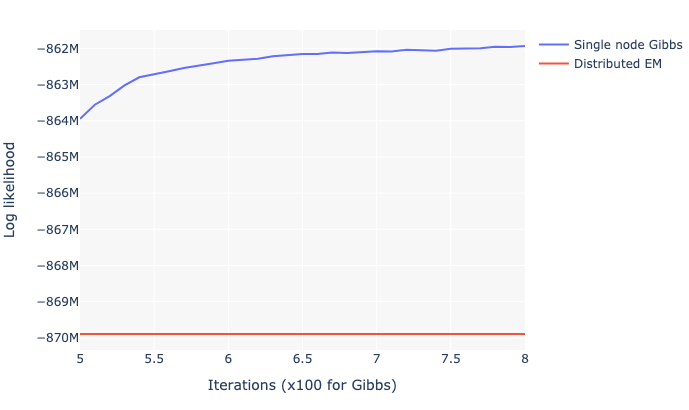

In [12]:
# Gibbs likelihood over iterations is calculated in the model
# We calculate the likelihood over iterations for spark models
# Then plot the results

ll_em = []
for i in range(1,5):
    model = spark_lda(algo='em', topic_num=10, feature_vecs=features, max_iter=i, seed=5)[0]
    ll_em.append(model.logLikelihood(features))
    
ll_online = []
for i in range(1,5):
    model = spark_lda(algo='online', topic_num=10, feature_vecs=features, max_iter=i, seed=5)[0]
    ll_online.append(model.logLikelihood(features))
        
print('EM Loglikelihood over 5 iterations:', ll_em, '\n')
print('Online Loglikelihood over 5 iterations:', ll_online)
    
# Plot the loglikelihoods vs iteratons
fig = go.Figure()
fig = plotly.subplots.make_subplots(specs=[[{"secondary_x": True}]])

fig.add_trace(go.Scatter(x=np.arange(5,8.1,.1), y=gibbs_model.loglikelihoods_[5:81],
                    mode='lines',
                    name='Single node Gibbs'))

fig.add_trace(go.Scatter(x=np.arange(5,8.1,1), y=ll_em,
                    mode='lines',
                    name='Distributed EM'))

# This is the trace for online - it doesn't present well visually so has been commented out
# fig.add_trace(go.Scatter(x=np.arange(5,8.1,1), y=ll_online,
#                     mode='lines',
#                     name='Online'))

fig.update_layout(title='Log likelihoods vs iterations',
                   xaxis_title='Iterations (x100 for Gibbs)',
                   yaxis_title='Log likelihood',
                  plot_bgcolor='rgba(0.1,0.1,0.1,0.035)')

# fig.show()
fig.show("png")

fig.write_image("project-2020-LSEDev/images/gibbs_converge.png")

## Perplexity and efficiency

In [8]:
# Calculate the perplexity and efficiency for different algorithms - I run these tests
# using an increasing sample size to see how well the data scales

# I have included code for all perplexity and efficiency test, but perplexity tests were only
# run for certain algorithms due to constraints

def perplexity_and_efficiency(algo, topic_num, train, test, stage=5, max_iter = 5, 
                              split_seed=True, lda_seed = 123):
    '''This function returns the test perplexity and computational time taken to run an
    LDA model. The perplexity and computational time are given for different sizes
    of training data
    The function has seven parameters:
    1. algo: The LDA algorithm to be used
    2. topic_num: Number of topics for the LDA model
    3. train: The features that the model will train on
    4. test: The features on which we will test perplexity
    5. stage: The number of sizes of training sets you want to fit. For example,
    stage=10 will fit the LDA model on 10 equally spaced increasing sizes of the 
    training data. The first fit will be with 10% of the training data and the final 
    fit will use 100% of the training data
    6. max_iter: The number of iterations we run the LDA model
    7. split_seed: True or False - True will split the training and testing data
    in the same way every iteration
    8. lda_seed: Specify False if you want the LDA to run differently each iteration
    '''      
    num_train_docs = train_eo.count()
    num_test_docs = test_eo.count()
    test_perplex = np.zeros(shape = (2,stage))
    computation_time = np.zeros(shape = (2,stage))
    interval = np.linspace(0.1, 1.0, stage)
    runs = 3 # take the average of several runs to reduce uncertainty in results
    for j in range(runs):
        for i in range(stage): # allows us to see how efficiency changes with increasing training size
            if split_seed:
                corpus = train.sample(False, interval[i], 10*j) # no replacement, sample size, set seed
            else:
                corpus = train.sample(False, interval[i])
            # Run LDA and record the time taken 
            t0 = time()
            model = spark_lda(algo=algo, topic_num=topic_num, feature_vecs=corpus,
                        max_iter=max_iter, seed=lda_seed)
            t1 = time()
            # Row 0 is training size
            computation_time[0,i] = interval[i]*num_train_docs
            test_perplex[0,i] = interval[i]*num_train_docs
            # Row 1 is computation/perplexity values
            computation_time[1,i] += (t1 - t0)/runs
            test_perplex[1,i] += model[0].logPerplexity(test)/runs
            print(str(i+1) + '/' + str(stage) + ' stages complete')
    return test_perplex, computation_time


def gibbs_non_dib_perplex_efficiency(stage):
    '''Runs a collapsed Gibbs model with varying sample sizes to determine the
    speed and efficiency'''
    train_gibbs = gibbs_matrix[:int(36236*0.9),:]
    test_gibbs = gibbs_matrix[int(36236*0.9):,:]
    num_train_docs = train_gibbs.shape[0]
    num_test_words = test_gibbs.sum()
    test_perplex = np.zeros(shape = (2,stage))
    computation_time = np.zeros(shape = (2,stage))
    interval = np.linspace(0.1, 1.0, stage)
    runs = 3 # take the average of several runs to reduce uncertainty in results
    for j in range(runs):
        for i in range(stage): # allows us to see how efficiency changes with increasing training size
            corpus = train_gibbs[np.random.choice(num_train_docs, int(interval[i]*num_train_docs), 
                                          replace=False), :]
            
            # Run LDA and record the time taken 
            t0 = time()
            model = non_dist_gibbs(corpus, testing = True)
            t1 = time()
            # Row 0 is training size
            computation_time[0,i] = interval[i]*num_train_docs
            test_perplex[0,i] = interval[i]*num_train_docs
            # Row 1 is computation/perplexity values
            computation_time[1,i] += (t1 - t0)/runs
            # Change the doc-topic dbn to the test data before calculating perplexity
            new_ndz = model.transform(test_gibbs) # use mean field approx from Buntine
            model.change_ndz_(np.array(new_ndz, dtype='int32'))
            test_perplex[1,i] += model.loglikelihood()/(runs*-num_test_words)
            print(str(i+1) + '/' + str(stage) + ' stages complete')
            
    return test_perplex, computation_time

def online_non_dib_perplex_efficiency(stage):
    '''Runs a single node online model with varying sample sizes to determine the
    speed and efficiency'''
    # Read in corpus
    single_online_data = [line.rstrip('\r\n').split(' ') for line in open('clean_data/all_text.txt')]
    
    # Process to useable form
    dictionary = Dictionary(single_online_data)
    s_online_corpus = [dictionary.doc2bow(text) for text in single_online_data]
    temp = dictionary[0]  
    id2word = dictionary.id2token
    
    train_docs = s_online_corpus[:int(36236*0.9)]
    test_docs = s_online_corpus[int(36236*0.9):] 
    num_train_docs = len(train_docs)
    test_perplex = np.zeros(shape = (2,stage))
    computation_time = np.zeros(shape = (2,stage))
    interval = np.linspace(0.1, 1.0, stage)
    runs = 3 # take the average of several runs to reduce uncertainty in results
    for j in range(runs):
        for i in range(stage): # allows us to see how efficiency changes with increasing training size
            corpus = itemgetter(*random.sample(range(num_train_docs), 
                                               int(interval[i]*num_train_docs)))(s_online_corpus)
            # Run LDA and record the time taken - run online LDA with 1 core
            t0 = time()
            s_online_model = LdaMulticore(corpus, id2word=id2word, num_topics=10, iterations = 5,
                                          workers = 1)
            t1 = time()
            # Row 0 is training size
            computation_time[0,i] = interval[i]*num_train_docs
            test_perplex[0,i] = interval[i]*num_train_docs
            # Row 1 is computation/perplexity values
            computation_time[1,i] += (t1 - t0)/runs
            test_perplex[1,i] += s_online_model.log_perplexity(test_docs)/runs
            print(str(i+1) + '/' + str(stage) + ' stages complete')
            
    return test_perplex, computation_time

In [7]:
# This cell can take up to a full day to run - it runs 5 LDAs for each algorithm on
# a large dataset

logging.disable(logging.CRITICAL)

# 90/10 training/testing split
train_eo, test_eo = features.randomSplit([9.0,1.0] ,3)

# Run EM several times
em_perplex, em_speed = perplexity_and_efficiency(algo='em', topic_num=10, 
                                                 train=train_eo, test=test_eo, 
                                                 stage=5, max_iter = 5, 
                                                 split_seed=True, lda_seed = 123)
# Run distributed online several times
online_perplex, online_speed = perplexity_and_efficiency(algo='online', topic_num=10, 
                                                 train=train_eo, test=test_eo, 
                                                 stage=5, max_iter = 5, 
                                                 split_seed=True, lda_seed = 123)


# Run single node online several times -ADD FILE SAVES HERE 
single_online_perplex, single_online_speed = online_non_dib_perplex_efficiency(5)

# Run single node Gibbs several times
gibbs_perplex, gibbs_speed = gibbs_non_dib_perplex_efficiency(5)


def save_efficiency_perplexity(architecture):
    '''Saves the results to file along with the architecture in the file name'''

    with open('project-2020-LSEDev/\
perplex_efficiency/em_perplex_' + architecture + '.pickle', 'wb') as handle:
        pickle.dump(em_perplex, handle, protocol=pickle.HIGHEST_PROTOCOL)  

    with open('project-2020-LSEDev/\
perplex_efficiency/em_speed_' + architecture + '.pickle', 'wb') as handle:
        pickle.dump(em_speed, handle, protocol=pickle.HIGHEST_PROTOCOL)  

    with open('project-2020-LSEDev/\
perplex_efficiency/online_perplex_' + architecture + '.pickle', 'wb') as handle:
        pickle.dump(online_perplex, handle, protocol=pickle.HIGHEST_PROTOCOL)  

    with open('project-2020-LSEDev/\
perplex_efficiency/online_speed_' + architecture + '.pickle', 'wb') as handle:
        pickle.dump(online_speed, handle, protocol=pickle.HIGHEST_PROTOCOL)
        
    with open('project-2020-LSEDev/\
perplex_efficiency/gibbs_perplex_' + architecture + '.pickle', 'wb') as handle:
        pickle.dump(gibbs_perplex, handle, protocol=pickle.HIGHEST_PROTOCOL)  
    
    with open('project-2020-LSEDev/\
perplex_efficiency/gibbs_speed_' + architecture + '.pickle', 'wb') as handle:
        pickle.dump(gibbs_speed, handle, protocol=pickle.HIGHEST_PROTOCOL)  
        
    with open('project-2020-LSEDev/\
perplex_efficiency/single_online_perplex_' + architecture + '.pickle', 'wb') as handle:
        pickle.dump(single_online_perplex, handle, protocol=pickle.HIGHEST_PROTOCOL)  
    
    with open('project-2020-LSEDev/\
perplex_efficiency/single_online_speed_' + architecture + '.pickle', 'wb') as handle:
        pickle.dump(single_online_speed, handle, protocol=pickle.HIGHEST_PROTOCOL)  
        
# Change the architecture based on what you have configured on GCP
save_efficiency_perplexity('1X_16_core')

1/5 stages complete
2/5 stages complete
3/5 stages complete
4/5 stages complete
5/5 stages complete
1/5 stages complete
2/5 stages complete
3/5 stages complete
4/5 stages complete
5/5 stages complete


To measure efficiency for distributed Gibbs, I first create datasets of increasing size and proceed to train the data. To create the training data, run the code below (uses all_text variable from Section 4.3.2). 

In [4]:
# Join the items together with spaces and new line characters
for training_sample in np.linspace(0.1, 1.0, 5):
    with open('ParallelGibbsLDA/efficiency_datasets/' + str(training_sample)[2] +'.txt',
              'a') as filehandle:
        for i, doc in enumerate(all_text):
            doc_words = ' '.join(doc)
            filehandle.write(doc_words + '\n')
            if i > int(training_sample * 36236):
                break

Then proceed to copy and paste the following Scala code in order to generate files used to perform training (in the sbt tab from 4.3.2.):  

    :paste
    import com.kifi.lda.CorpusUtil  
    for( file <- List("1", "3", "5", "7", "0"){  
        val format_text = new CorpusUtil  
        format_text.process("efficiency_datasets/" + file + ".txt", "efficiency_datasets/idcorpus" + file + ".txt", "efficiency_datasets/encoding" + file + ".txt", "efficiency_datasets/ids" + file + ".txt", 0, 424507)}      
    }

Press ctrl-D to interpret

The output should look like this and the files will appear in the designated directory:  

<img src="images/scala_files.png" width="400" height="200"/>

Lastly, in a new terminal tab run the following for each file above and record the results. Here is one example:  
_time java -jar ParallelGibbsLDA/target/scala-2.10/LDA.jar -nw 16 -t 10 -voc 424507 -iter 50 -b 40000 -in ParallelGibbsLDA/efficiency_datasets/idcorpus0.txt -betaFile beta.bin -verbose true_

The results should look as follows:  

<img src="images/dib_gibbs_time.png" width="400" height="200"/>

I use the user metric which measures the time from the start of the process to the end. Running the above for all 5 samples files generates the following runtimes on 3X 4 core workers and a 4 core master:

Corpus sample sizes: 3623, 11776, 19929, 28082, 36236

Elapsed times: 2m6.950s, 5m2.955s, 7m24.347s, 8m54.559s, 10m3.552s

In [3]:
# Visualise efficiency and perplexity

architecture = '1X_16_core'

f = 'project-2020-LSEDev/perplex_efficiency/'
em_p = f + 'em_perplex_' + architecture + '.pickle'
em_t = f + 'em_speed_' + architecture + '.pickle'
on_p = f + 'online_perplex_' + architecture + '.pickle'
on_t = f + 'online_speed_' + architecture + '.pickle'
g_p = f + 'gibbs_perplex_' + architecture + '.pickle'
g_t = f + 'gibbs_speed_' + architecture + '.pickle'
son_p = f + 'single_online_perplex_' + architecture + '.pickle'
son_t = f + 'single_online_speed_' + architecture + '.pickle'

with open(em_p, 'rb') as handle:
    perplex_em = pickle.load(handle)
    
with open(em_t, 'rb') as handle:    
    time_em = pickle.load(handle)
    
with open(on_p, 'rb') as handle:
    perplex_online = pickle.load(handle)
    
with open(on_t, 'rb') as handle:   
    time_online = pickle.load(handle)

with open(g_p, 'rb') as handle:
    perplex_gibbs = pickle.load(handle)
    
with open(g_t, 'rb') as handle:    
    time_gibbs = pickle.load(handle)
    
# with open(son_p, 'rb') as handle:
#     single_online_perplex = pickle.load(handle)
    
with open(son_t, 'rb') as handle:    
    single_online_speed = pickle.load(handle)

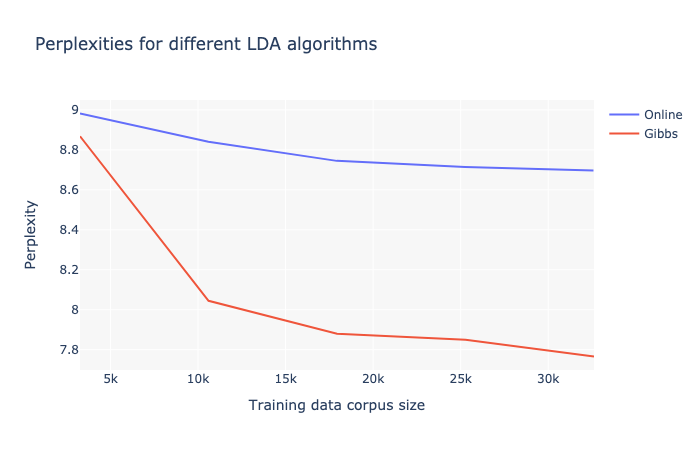

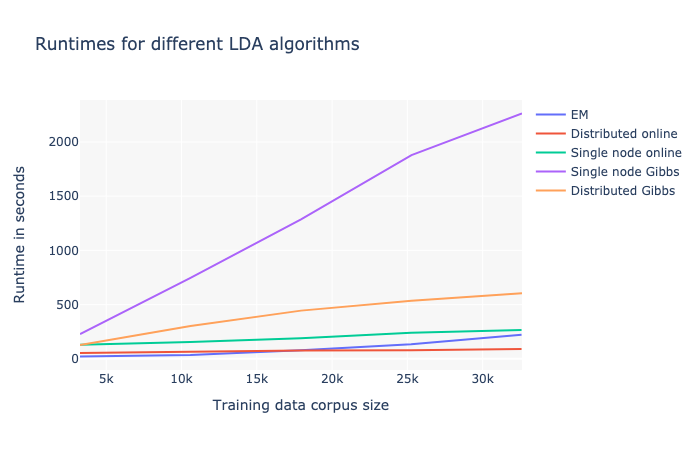

In [4]:
fig = go.Figure()
# fig.add_trace(go.Scatter(x=perplex_em[0], y=perplex_em[1],
#                     mode='lines',
#                     name='EM'))
fig.add_trace(go.Scatter(x=perplex_online[0], y=perplex_online[1],
                    mode='lines',
                    name='Online'))

fig.add_trace(go.Scatter(x=perplex_gibbs[0], y=perplex_gibbs[1],
                    mode='lines',
                    name='Gibbs'))

fig.update_layout(title='Perplexities for different LDA algorithms',
                   xaxis_title='Training data corpus size',
                   yaxis_title='Perplexity',
                  plot_bgcolor='rgba(0.1,0.1,0.1,0.035)')

fig.show('png')
# fig.show()

fig1 = go.Figure()
fig1.add_trace(go.Scatter(x=time_em[0], y=time_em[1],
                    mode='lines',
                    name='EM'))

fig1.add_trace(go.Scatter(x=time_online[0], y=time_online[1],
                    mode='lines',
                    name='Distributed online'))

fig1.add_trace(go.Scatter(x=single_online_speed[0], y=single_online_speed[1],
                    mode='lines',
                    name='Single node online'))

fig1.add_trace(go.Scatter(x=time_gibbs[0], y=time_gibbs[1],
                    mode='lines',
                    name='Single node Gibbs'))

fig1.add_trace(go.Scatter(x=np.linspace(0.1, 1.0, 5)*36236*0.9, 
                          y=[2*60+6.950, 5*60+2.955, 7*60+24.347, 8*60+54.559,10*60+3.552],
                    mode='lines',
                    name='Distributed Gibbs'))

fig1.update_layout(title='Runtimes for different LDA algorithms',
                   xaxis_title='Training data corpus size',
                   yaxis_title='Runtime in seconds',
                  plot_bgcolor='rgba(0.1,0.1,0.1,0.035)')


fig1.show('png')
# fig1.show()

fig.write_image("project-2020-LSEDev/images/perplex.png")
fig1.write_image("project-2020-LSEDev/images/efficiency.png")

## EM and online topic coherence measures
I now measure how coherent words within a topic are and use this as an indicator of model quality - I take top 10 words for each topic. 

I look at two different topic coherence measures. More details are included in the report. These two measures are:  
1. Pointwise mutual information (PMI)  
2. Word intrusion

In order to perform all topic coherence evaluation measures, we need to write topic-word distributions to file where each word within a topic is separated by a space and each topic by a new line. This is done below.

In [29]:
# EM
f = open("project-2020-LSEDev/topic_interpretability/data/dib_em_topics.txt","w")

for topic in topic_dbn_em.values():
    for word in topic:
        f.write(word + ' ')
    f.write('\n')

f.close() 

# Online
f = open("project-2020-LSEDev/topic_interpretability/data/dib_online_topics.txt","w")

for topic in topic_dbn_online.values():
    for word in topic:
        f.write(word + ' ')
    f.write('\n')

f.close() 

# Topic-word distributions for the other algorithms were copied and pasted 
# manually - it was quicker to do so 

All code for this is contained in the GitHub repo under the topic_interpretability folder. In order to obtain PMI and NPMI scores, one needs to run all run-oc.sh scripts in the topic_interpretability/data. folder. The data used by these scripts is stored in topic_interpretability/data. Please ensure you are in the topic_interpretability fodler when running the script below (calculates distributed online PMI):  

_sh run-oc_dib_online.sh_
  
For distributed Gibbs, run the following code in the Scala terminal:  
_reader.evaluateModelPMI("idcorpus.txt")_  

The output should look as follows:  

<img src="images/gibbs_pmi.png" width="400" height="200"/>

I proceed to run word intrusion tests. Details on the metric can be found in the report. Files are manually created for this anaylsis. Note that the scripts runs binary files (for the SVM component of the automatic word intrusion algorithm) - the binary files in the repo will run on macos but not on other operating systems. If you are not using a mac, please see this [link](http://www.cs.cornell.edu/people/tj/svm_light/svm_rank.html) to compile the SVM files. Run these scripts for results:

_sh run-wi_dib_gibbs.sh  
sh run-wi_dib_online.sh_  

All results can be found in topic_interpretability/results - filenames contain the algorithms and topic coherence measures.


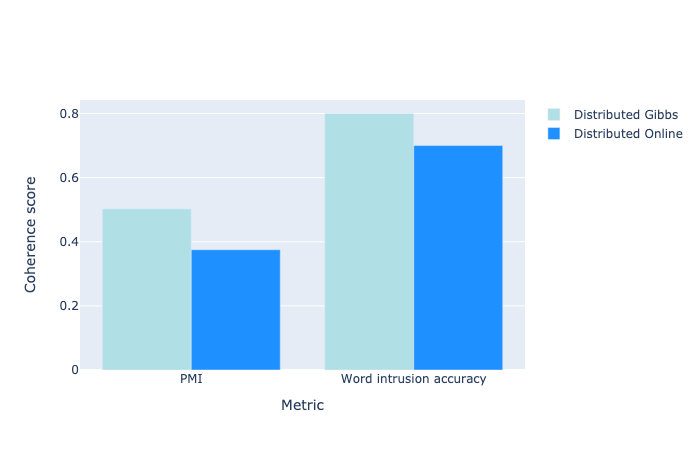

In [28]:
# Visualise the coherences results (PMI and word intrusion)

algos = ['PMI', 'Word intrusion accuracy']

fig = go.Figure()

fig.add_trace(go.Bar(
    x=algos,
    y=[0.503, 0.8],
    name='Distributed Gibbs',
    marker_color='powderblue'
))
fig.add_trace(go.Bar(
    x=algos,
    y=[0.375, 0.7],
    name='Distributed Online',
    marker_color='dodgerblue'
))



fig.update_layout(barmode='group',
                 xaxis_title='Metric',
                  yaxis_title='Coherence score')
fig.show('png')

fig.write_image("project-2020-LSEDev/images/metrics.png")

# Scaling up 
I now scale up using the Amazon reviews dataset available at this [link](http://deepyeti.ucsd.edu/jianmo/amazon/index.html). I have not uploaded the data as it is 128GB. However, you can simply use the wget command with the above link to access it.  

The code below processes the data, applies CountVectoriser and runs LDA. The whole process can take a day or more to run on a GCP cluster considering the dataset consists of 233.1 million reviews.  

First create a regular bucket and cluster (with 1 master and 2 workers using  n1-standard-8 type machines - this can be scaled up to more workers once the data has been processed and the LDA is ready to run).

First, I execute parallel Gibbs. Run the code below on your local machine:  
gsutil cp path/to/file/ParallelGibbsLDA gs://gbucket446    

## Gibbs

Following similar steps to Section 4.3.2, prepare the data for Gibbs analysis. Making sure you are in the ParallelGibbsLDA directory, run the following:  
 
1. We now need to process the data to the format required by the Gibbs Sampler. Run the following in the regular terminal (three text files named 'idcorpus_amazon.txt', 'encoding_amazon.txt' and 'ids_amazon.txt' will be created):  
    _SBT_OPTS=-Xmx32G sbt (you will enter sbt:LDA)  
    console  
    import com.kifi.lda.CorpusUtil   
    val format_text = new CorpusUtil  
    format_text.process("amazon_gibbs.txt/part-00000", "idcorpus_amazon.txt", "encoding_amazon.txt", "ids_amazon.txt", 0, 31087974)_
    
2. Using GCP, run the following command using the SSH command line (make sure you are in the ParallelGibbsLDA directory):  
    _time java -jar target/scala-2.10/LDA.jar -nw 42 -t 10 -voc 262144 -iter 50 -b 50000000 -in  idcorpus_amazon.txt -betaFile beta_amazon.bin -verbose true_  
    
    The output should look like this:  
    
    <img src="images/run_gibbs.png" width="800" height="500"/>

3. To extract topic-word distribution, download the files produced by running the jar on GCP and run the following in the sbt console:  
    _import com.kifi.lda.ModelReader  
    val beta = ModelReader.parseBeta("beta_amazon.bin")   
    val word2id = ModelReader.parseWord2id("encoding_amazon.txt")  
    val reader = new ModelReader(beta, word2id)  
    val topics = reader.getAllTopics()  
    scala.tools.nsc.io.File("topic_words_amazon.txt").writeAll(topics)_  
4. Results can be found in the topic_words_amazon.txt file

## Online

Now I focus on running distributed online. Run the code below on the master worker terminal:   


wget http://deepyeti.ucsd.edu/jianmo/amazon/categoryFiles/All_Amazon_Review.json.gz  
gunzip -k All_Amazon_Review.json.gz  
hadoop fs -mkdir /amazon  
hadoop fs -put All_Amazon_Review.json /amazon  

In [7]:
from pyspark.sql.types import *
from pyspark.ml.feature import CountVectorizer, CountVectorizerModel
import pyspark.ml.clustering
from pyspark.ml.clustering import LDA, LocalLDAModel

# Prepare data for for distributed online
amazon_reviews = spark.read.json('hdfs:///amazon/All_Amazon_Review.json')
amazon_reviews_rdd = amazon_reviews.select('reviewText').rdd.map(tuple) \
                                    .filter(lambda x: x[0]!=None) \
                                    .map(lambda x: x[0].replace('\n', ' ').replace(',', ' ').replace('.',''))
print(amazon_reviews_rdd.take(5))

["Alexa is not able to control my lights If I ask her to tell me what LIFX can do  she will give me an example with one of my group names If I use that exact same group name in a new request  she'll await that she doesn't recognize the name This skill is VERY buggy and has not yet worked for me I even rest Alexa  uninstalled LIFX  and set everything up again", 'Alexa works great for me so far  but I\'m also only controlling a single bulb at the moment Turning on/off  changing colors and adjusting brightness are all easy and quick That being said  I\'m expecting complications as I add more bulbs (hope for the best prepare for the worst  right?)  I\'d speculate that some other users\' frustrations might stem from Alexa not recognizing their bulb or room names After simplifying my bulb name to \'Lamp\' and listing it under a Living Room group (within the LIFx app)  I\'ve been able to address it by either category pretty consistently "Turn on/off living room lights" "Change lamp light to [

In [6]:
# Perform some data cleaning and tokenise
amazon_reviews_rdd_online = amazon_reviews.select('reviewText').rdd.map(tuple) \
                                    .filter(lambda x: x[0]!=None) \
                                    .map(lambda x: x[0].replace('\n', ' ') \
                                    .replace(',', ' ').replace('.','')) \
                                    .map(lambda x: (1, x.split()))

amazon_reviews_rdd_online.take(5)

[(1,
  ['Alexa',
   'is',
   'not',
   'able',
   'to',
   'control',
   'my',
   'lights',
   'If',
   'I',
   'ask',
   'her',
   'to',
   'tell',
   'me',
   'what',
   'LIFX',
   'can',
   'do',
   'she',
   'will',
   'give',
   'me',
   'an',
   'example',
   'with',
   'one',
   'of',
   'my',
   'group',
   'names',
   'If',
   'I',
   'use',
   'that',
   'exact',
   'same',
   'group',
   'name',
   'in',
   'a',
   'new',
   'request',
   "she'll",
   'await',
   'that',
   'she',
   "doesn't",
   'recognize',
   'the',
   'name',
   'This',
   'skill',
   'is',
   'VERY',
   'buggy',
   'and',
   'has',
   'not',
   'yet',
   'worked',
   'for',
   'me',
   'I',
   'even',
   'rest',
   'Alexa',
   'uninstalled',
   'LIFX',
   'and',
   'set',
   'everything',
   'up',
   'again']),
 (1,
  ['Alexa',
   'works',
   'great',
   'for',
   'me',
   'so',
   'far',
   'but',
   "I'm",
   'also',
   'only',
   'controlling',
   'a',
   'single',
   'bulb',
   'at',
   'the',
   '

In [ ]:
# Save to parquet file in bucket so doesn't have to be created each time a cluster is opened
review_df = spark.createDataFrame(amazon_reviews_rdd_online, ["dummy","text"])

review_df.write.parquet("gs://gbucket446/review_df.parquet")

In [8]:
review_df = spark.read.parquet("gs://gbucket446/review_df.parquet")

sc._conf.set("spark.driver.memory", "15g")
sc._conf.set("spark.executor.memory", "20g")

cv_amazon = CountVectorizer(inputCol="text", outputCol="features", vocabSize = 35000000)

cv_model_amazon = cv_amazon.fit(review_df)

features_amazon = cv_model_amazon.transform(review_df)

features_amazon.write.parquet("gs://gbucket446/features_amazon_big.parquet")

In [2]:
features = spark.read.parquet("gs://gbucket446/features_amazon.parquet")
print(features.count())
features.show(10)

197995265
+-----+--------------------+--------------------+
|dummy|                text|            features|
+-----+--------------------+--------------------+
|    1|[If, you, are, a,...|(500000,[0,1,2,3,...|
|    1|[When, I, got, th...|(500000,[0,1,2,3,...|
|    1|[Thanks, Vance, f...|(500000,[1,2,3,4,...|
|    1|[I, found, this, ...|(500000,[0,1,2,4,...|
|    1|[Having, attended...|(500000,[0,1,2,3,...|
|    1|[A, brother, in, ...|(500000,[0,1,3,4,...|
|    1|[I, loved, this, ...|(500000,[0,2,3,4,...|
|    1|[I, really, thoro...|(500000,[0,2,3,5,...|
|    1|[Inescapable, is,...|(500000,[0,1,3,4,...|
|    1|[It, was, a, nice...|(500000,[0,1,4,5,...|
+-----+--------------------+--------------------+
only showing top 10 rows



In [ ]:
t0=time.time()
amazon_lda = LDA(k=10, maxIter=5, optimizer='online')
amazon_lda_model = amazon_lda.fit(features)
print('Time taken:', time.time()-t0)

('Time taken:', 4826.9391040802)


# Bibliography

I have included some auxiliary references that I used to build my code, models and evaluations. Please see references in the report for a formal list of primary sources I used.


https://www.kaggle.com/xhlulu/cord-19-eda-parse-json-and-generate-clean-csv#Biorxiv:-Generate-CSV

https://spark.apache.org/docs/latest/api/python/pyspark.ml.html#pyspark.ml.clustering.LDA  

https://towardsdatascience.com/evaluate-topic-model-in-python-latent-dirichlet-allocation-lda-7d57484bb5d0 

https://github.com/kifi/ReactiveLDA 

https://towardsdatascience.com/the-next-level-of-data-visualization-in-python-dd6e99039d5e 

https://arxiv.org/pdf/1205.2662.pdf

https://github.com/jhlau/topic_interpretability

https://medium.com/kifi-engineering/reactive-lda-library-d495ed2a6342

# Acknowledgements 
Thanks to Yingjie Miao and Jey Han Lau who provided valuable clarification on their research into LDA techniques and whose code I adapted in running certain tests.